In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### - Analyse de forme

    Shape: 10000 rows : 13 columns

    Data types: 
      int64: 8
      object : 3
      float64 : 2

    Valeur Manquante:No NAN

    Target : "Exited" 
      
      79.6% = O
      20.4% = 1

### - Analyse de fond

#### Target

    unbalanced datasets ratio 80 - 20
#### Integer

    CustomerId     =>  A id
    CreditScore :   
      We can observe that credit card attribution follow the normal law with a small skew
      We have almots the same distribution for our both population.
      Some Outliers
    Age            =>  
      Distributions difference between both population
      Exited = 1 mean age : 45
      Exited = 0 mean age : 37 
      Global Age distribution is skwed
    Balance       =>
      A lot of 0, both population have the same distribution
      Except 0 we can observe a normal distribution
    EstimatedSalary =>
      Both population have agai the same distribution 
      Estimated Salary follow a uniform law
    
    Sex =>
      Male and Female : balanced
      OHE

      No difference between both population

    Tenure =>
      bewteen 0 and 10
    
    Geography =>
      We have 3 countries France, Germany and Spain
      OHE
    
    Number of products =>
      between 0 and 4 

      50% of the clients subscribed to only one product
      
      69% of Exited = 1 had one product


In [35]:
data = pd.read_csv('../Data/Churn_Modelling.csv', index_col="RowNumber")

In [3]:
data.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.shape

(10000, 13)

In [6]:
data.dtypes.value_counts()

int64      8
object     3
float64    2
dtype: int64

In [ ]:
data.isna().sum()

#### Target

In [ ]:
data['Exited'].value_counts()/data.shape[0]*100

In [ ]:
data['Exited'].value_counts().plot(kind='bar')
plt.title('Exited repartiton')
plt.ylabel('clients')
plt.xlabel('exited status')
plt.xticks(rotation=0)

In [ ]:
integer = data[['Age','CreditScore','Balance','EstimatedSalary']]
objet = data[['Geography','Gender', 'Tenure','NumOfProducts','HasCrCard','IsActiveMember']]

### Integer 

In [ ]:
integer.head()

In [ ]:
for col in integer.columns:  
  print(integer[col][data['Exited']==0].describe())
  print(integer[col][data['Exited']==1].describe())
  fig,axes= plt.subplots(1,2, figsize =(15,5))
  sns.histplot(data=integer, x=col, hue=data['Exited'],ax= axes[0])
  sns.boxplot(integer[col],ax= axes[1])
  plt.title('Distribution of Credit Score')
  plt.show()

### Objects

In [ ]:
objet.head()

In [ ]:
for col in objet.columns:
  print(f'\n#### {col} ####\n')
  print('Exited = 0\n')
  print(objet[col][data['Exited']==0].value_counts()/data[data['Exited']==0].shape[0]*100)
  print("\nExited = 1\n")
  print(objet[col][data['Exited']==1].value_counts()/data[data['Exited']==1].shape[0]*100)
  print("\n#####\n")
  data[col].value_counts().plot(kind='bar')
  plt.xticks(rotation=0)
  plt.title(f'Repartition of {col}')
  plt.show()

### Preprocessing | Pipeline | Model


In [2]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures, PowerTransformer
from sklearn.compose import ColumnTransformer

In [3]:
CONFIG = {}

CONFIG['drop'] = ['CustomerId','Surname']
CONFIG['OHE'] = ['Geography','Gender']
CONFIG['num'] = ['CreditScore','Age','Balance','EstimatedSalary']
CONFIG['passthrough'] = ['Tenure','NumOfProducts','HasCrCard','IsActiveMember']

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [5]:
preprocessor_int = Pipeline(
  steps=[
    ('Scaller', MinMaxScaler()),
    ('Poly', PolynomialFeatures(degree=5))
  ]
)


preprocessor = ColumnTransformer(
    transformers=[
      ('drop','drop',CONFIG['drop']),
      ('OHE',OneHotEncoder(),CONFIG['OHE']),
      ('Num',preprocessor_int,CONFIG['num']),
      ('passthrough','passthrough',CONFIG['passthrough'])
    ]
)

In [6]:
from sklearn.model_selection import train_test_split, cross_validate, learning_curve

In [10]:
X = data.drop('Exited', axis = 1)
y = data['Exited']

In [11]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=400)

In [12]:
import mlflow
mlflow.create_experiment('Churn')

/home/ariless/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: MLflow support for Python 3.6 is deprecated and will be dropped in an upcoming release. At that point, existing Python 3.6 workflows that use MLflow will continue to work without modification, but Python 3.6 users will no longer get access to the latest MLflow features and bugfixes. We recommend that you upgrade to Python 3.7 or newer.
  """Entry point for launching an IPython kernel.


MlflowException: Experiment 'Churn' already exists.

In [13]:
Models = {}

Models['Log_reg'] = Pipeline(
                        steps=[
                            ('preprocessing',preprocessor),
                            ('model', LogisticRegression(C=10, random_state=400, n_jobs=-1, max_iter=200))
                        ]
                    )

# Models['SVC'] = Pipeline(
#                         steps=[
#                         ('preprocessing',preprocessor),
#                         ('model', SVC(random_state=400, kernel="rbf"))
#                     ]
#                 )

# Models['DecisionTree'] =Pipeline(
#                         steps=[
#                         ('preprocessing',preprocessor),
#                         ('model', DecisionTreeClassifier())
#                     ]
#                 )


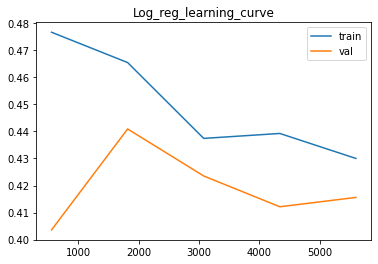

In [15]:
for key,pipeline in Models.items():
    with mlflow.start_run(run_name=key):

        cv = cross_validate(pipeline , X_train, y_train, 
                            cv=5,scoring=['precision','recall','f1'],
                            return_train_score=True)

        cv_result = pd.DataFrame(cv).to_html('assets/cv_result.html')
        
        N, train,val = learning_curve(pipeline, X_train, y_train, cv=5,random_state=400, scoring='f1', n_jobs=-1)
        plt.figure()
        plt.plot(N, train.mean(1), label='train')
        plt.plot(N, val.mean(1), label ='val')
        plt.title(f'{key}_learning_curve')
        plt.legend()
        plt.savefig(f'{key}_learning_curve.png')

        # Fit the model 

        pipeline = pipeline.fit(X_train,y_train)

        pred = pipeline.predict(X_test)
        
        # Metrics
        
        mlflow.log_metric('F1 Train', cv['test_f1'].mean())
        mlflow.log_metric('F1 Test', cv['train_f1'].mean())

        # Params 

        mlflow.log_params(pipeline.steps[1][1].get_params())

        #Artifact

        mlflow.log_artifact(f'{key}_learning_curve.png')
        mlflow.log_artifact('assets/cv_result.html')

        #Log Model

        mlflow.sklearn.log_model(pipeline, 'model')